In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%config IPcompletor.greedy = True
print("Python: {}".format(sys.version))

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


In [2]:
train_set = pd.read_csv("tcdml1920-rec-click-pred--training.csv", index_col = 0)
test_set = pd.read_csv("tcdml1920-rec-click-pred--test.csv", index_col = 0)

C:\Users\vansh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,5,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### NULL values

In [3]:
train_set.replace(["\\N", "nA", "Not provided"], np.nan, inplace=True)
test_set.replace(["\\N", "nA", "Not provided"], np.nan, inplace=True)

### To Numeric

In [4]:
train_set["abstract_word_count"] = pd.to_numeric(train_set["abstract_word_count"], errors='coerce')
train_set["query_word_count"] = pd.to_numeric(train_set["query_word_count"], errors='coerce')
train_set["query_char_count"] = pd.to_numeric(train_set["query_char_count"], errors='coerce')
train_set["query_document_id"] = pd.to_numeric(train_set["query_document_id"], errors='coerce')
train_set["year_published"] = pd.to_numeric(train_set["year_published"], errors='coerce')
train_set["number_of_authors"] = pd.to_numeric(train_set["number_of_authors"], errors='coerce')
train_set["abstract_char_count"] = pd.to_numeric(train_set["abstract_char_count"], errors='coerce')
train_set["first_author_id"] = pd.to_numeric(train_set["first_author_id"], errors='coerce')
train_set["num_pubs_by_first_author"] = pd.to_numeric(train_set["num_pubs_by_first_author"], errors='coerce')
train_set["hour_request_received"] = pd.to_numeric(train_set["hour_request_received"], errors='coerce')
train_set["local_hour_of_request"] = pd.to_numeric(train_set["local_hour_of_request"], errors='coerce')
train_set["recommendation_algorithm_id_used"] = pd.to_numeric(train_set["recommendation_algorithm_id_used"], errors='coerce')
train_set["clicks"] = pd.to_numeric(train_set["clicks"], errors='coerce')

In [5]:
test_set["abstract_word_count"] = pd.to_numeric(test_set["abstract_word_count"], errors='coerce')
test_set["query_word_count"] = pd.to_numeric(test_set["query_word_count"], errors='coerce')
test_set["query_char_count"] = pd.to_numeric(test_set["query_char_count"], errors='coerce')
test_set["query_document_id"] = pd.to_numeric(test_set["query_document_id"], errors='coerce')
test_set["year_published"] = pd.to_numeric(test_set["year_published"], errors='coerce')
test_set["number_of_authors"] = pd.to_numeric(test_set["number_of_authors"], errors='coerce')
test_set["abstract_char_count"] = pd.to_numeric(test_set["abstract_char_count"], errors='coerce')
test_set["first_author_id"] = pd.to_numeric(test_set["first_author_id"], errors='coerce')
test_set["num_pubs_by_first_author"] = pd.to_numeric(test_set["num_pubs_by_first_author"], errors='coerce')
test_set["hour_request_received"] = pd.to_numeric(test_set["hour_request_received"], errors='coerce')
test_set["local_hour_of_request"] = pd.to_numeric(test_set["local_hour_of_request"], errors='coerce')
test_set["recommendation_algorithm_id_used"] = pd.to_numeric(test_set["recommendation_algorithm_id_used"], errors='coerce')
test_set["clicks"] = pd.to_numeric(test_set["clicks"], errors='coerce')

### To Datatime

In [6]:
train_set.request_received = pd.to_datetime(train_set.request_received, format= "%d/%m/%Y %H:%M")
train_set.response_delivered = pd.to_datetime(train_set.response_delivered, format= "%d/%m/%Y %H:%M")
train_set.local_time_of_request = pd.to_datetime(train_set.local_time_of_request, format= "%d/%m/%Y %H:%M")
train_set.time_recs_recieved = pd.to_datetime(train_set.time_recs_recieved, format= "%d/%m/%Y %H:%M")
train_set.time_recs_displayed = pd.to_datetime(train_set.time_recs_displayed, format= "%d/%m/%Y %H:%M")
train_set.time_recs_viewed = pd.to_datetime(train_set.time_recs_viewed, format= "%d/%m/%Y %H:%M")

In [7]:
test_set.request_received = pd.to_datetime(test_set.request_received, format= "%d/%m/%Y %H:%M")
test_set.response_delivered = pd.to_datetime(test_set.response_delivered, format= "%d/%m/%Y %H:%M")
test_set.local_time_of_request = pd.to_datetime(test_set.local_time_of_request, format= "%d/%m/%Y %H:%M")
test_set.time_recs_recieved = pd.to_datetime(test_set.time_recs_recieved, format= "%d/%m/%Y %H:%M")
test_set.time_recs_displayed = pd.to_datetime(test_set.time_recs_displayed, format= "%d/%m/%Y %H:%M")
test_set.time_recs_viewed = pd.to_datetime(test_set.time_recs_viewed, format= "%d/%m/%Y %H:%M")

### Basic visualizations

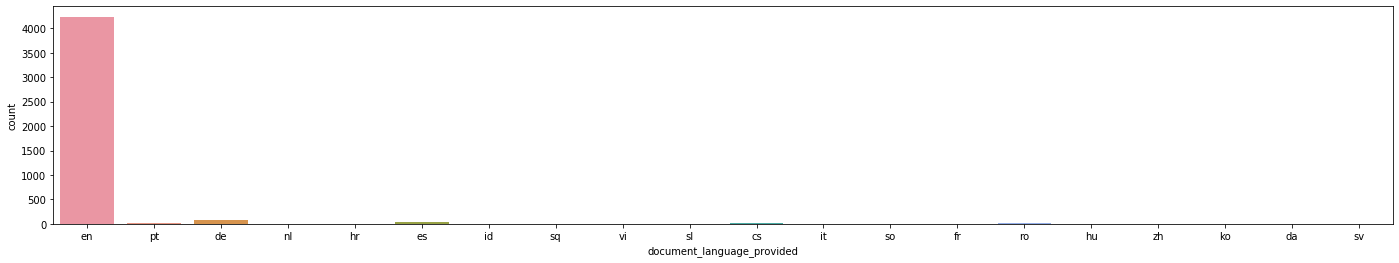

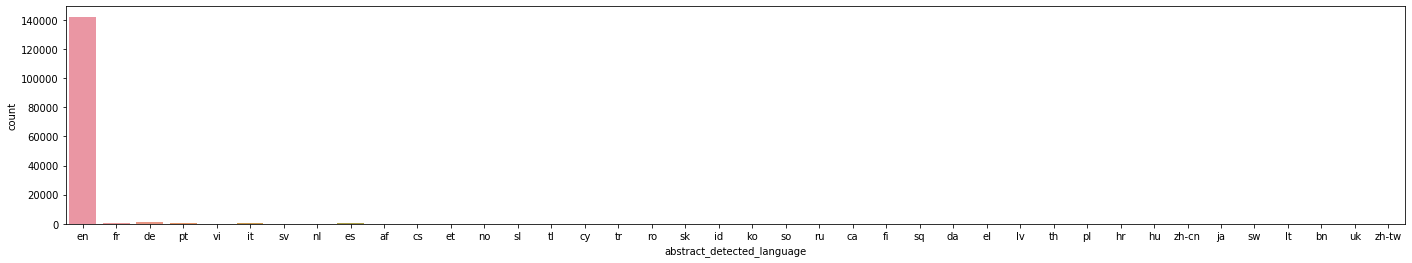

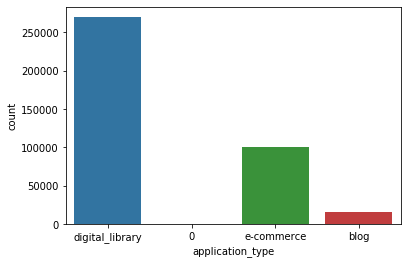

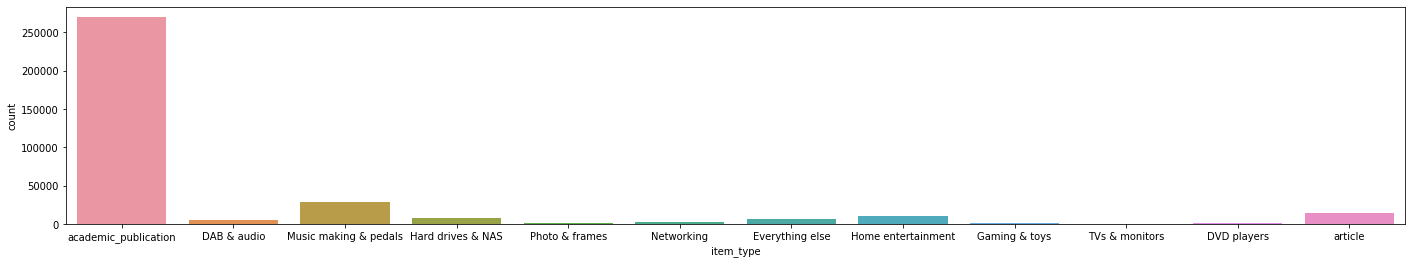

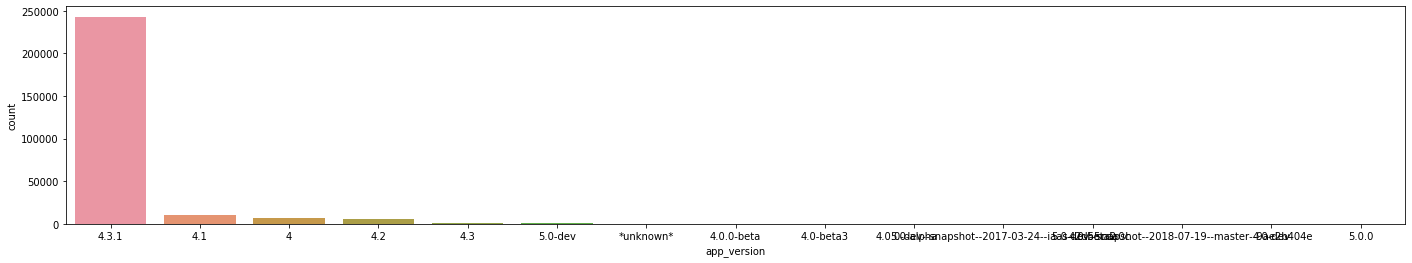

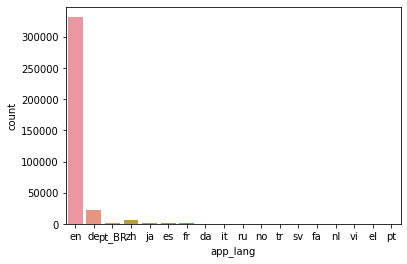

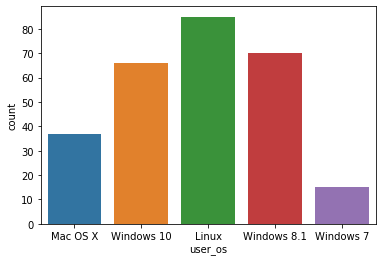

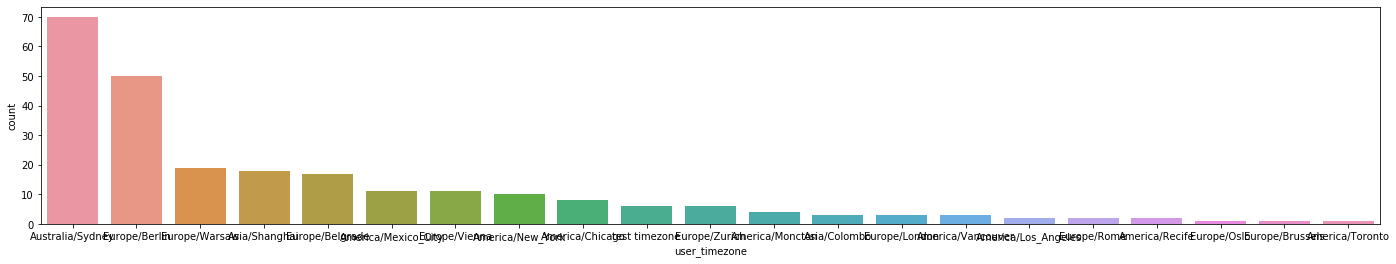

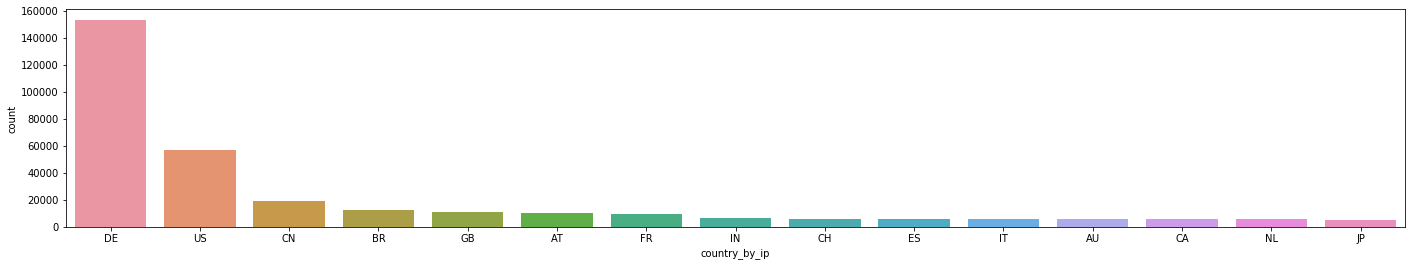

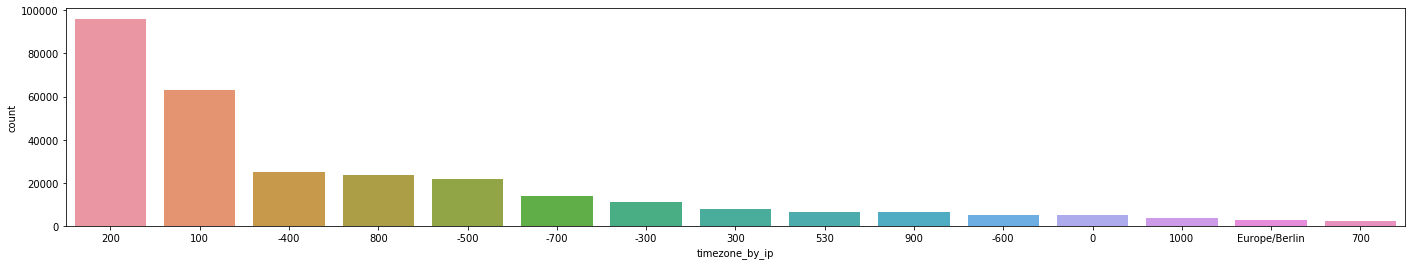

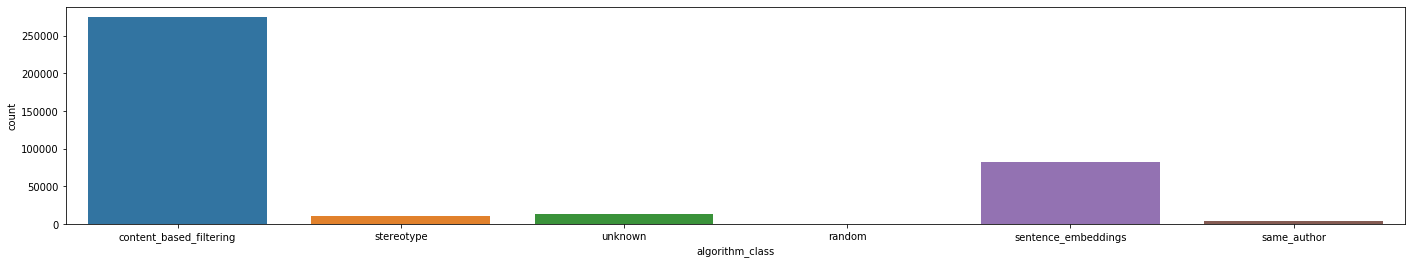

In [17]:
plt.figure(figsize=(24,4))
# sns.countplot(x="query_identifier", data=train_set)
# plt.show()
sns.countplot(x="document_language_provided", data=train_set)
plt.show()
plt.figure(figsize=(24,4))
sns.countplot(x="abstract_detected_language", data=train_set)
plt.show()
sns.countplot(x="application_type", data=train_set)
plt.show()
plt.figure(figsize=(24,4))
sns.countplot(x="item_type", data=train_set)
plt.show()
plt.figure(figsize=(24,4))
sns.countplot(x="app_version", data=train_set, order=pd.value_counts(train_set['app_version']).iloc[:10].index)
plt.show()
sns.countplot(x="app_lang", data=train_set)
plt.show()
sns.countplot(x="user_os", data=train_set)
plt.show()
# sns.countplot(x="user_os_version", data=train_set)
# plt.show()
# sns.countplot(x="user_java_version", data=train_set)
# plt.show()
plt.figure(figsize=(24,4))
sns.countplot(x="user_timezone", data=train_set, order=pd.value_counts(train_set['user_timezone']).index)
plt.show()
plt.figure(figsize=(24,4))
sns.countplot(x="country_by_ip", data=train_set, order=pd.value_counts(train_set['country_by_ip']).iloc[:15].index)
plt.show()
plt.figure(figsize=(24,4))
sns.countplot(x="timezone_by_ip", data=train_set, order=pd.value_counts(train_set['timezone_by_ip']).iloc[:15].index)
plt.show()
plt.figure(figsize=(24,4))
sns.countplot(x="algorithm_class", data=train_set)
plt.show()

### Encoding
- One hot
- Target